In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
   # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------") 

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | buenaventura
Processing Record 2 of Set 1 | guerrero negro
Processing Record 3 of Set 1 | umm kaddadah
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | xining
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | mar del plata
Processing Record 8 of Set 1 | bilma
Processing Record 9 of Set 1 | rovaniemi
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | jizan
Processing Record 13 of Set 1 | ponta do sol
Processing Record 14 of Set 1 | amderma
City not found. Skipping...
Processing Record 15 of Set 1 | necochea
Processing Record 16 of Set 1 | mitchell
Processing Record 17 of Set 1 | sao joao da barra
Processing Record 18 of Set 1 | barrow
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | chapais
Processing Record 22 of Set 1 | mao
Proce

Processing Record 41 of Set 4 | lata
Processing Record 42 of Set 4 | kulim
Processing Record 43 of Set 4 | kaeo
Processing Record 44 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 45 of Set 4 | ahipara
Processing Record 46 of Set 4 | olafsvik
Processing Record 47 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 48 of Set 4 | clyde river
Processing Record 49 of Set 4 | sao filipe
Processing Record 50 of Set 4 | miles city
Processing Record 1 of Set 5 | victoria
Processing Record 2 of Set 5 | provideniya
Processing Record 3 of Set 5 | kholmogory
Processing Record 4 of Set 5 | magadan
Processing Record 5 of Set 5 | kirakira
Processing Record 6 of Set 5 | miyang
Processing Record 7 of Set 5 | hailar
Processing Record 8 of Set 5 | praia da vitoria
Processing Record 9 of Set 5 | beringovskiy
Processing Record 10 of Set 5 | miramar
Processing Record 11 of Set 5 | riachao das neves
Processing Record 12 of Set 5 | san felipe
Processing Record 13 of Se

Processing Record 32 of Set 8 | turayf
Processing Record 33 of Set 8 | bac lieu
Processing Record 34 of Set 8 | obihiro
Processing Record 35 of Set 8 | roald
Processing Record 36 of Set 8 | anderson
Processing Record 37 of Set 8 | karlstadt
Processing Record 38 of Set 8 | nagato
Processing Record 39 of Set 8 | ormara
Processing Record 40 of Set 8 | harper
Processing Record 41 of Set 8 | iqaluit
Processing Record 42 of Set 8 | gizo
Processing Record 43 of Set 8 | san lazaro
Processing Record 44 of Set 8 | yar-sale
Processing Record 45 of Set 8 | muros
Processing Record 46 of Set 8 | manokwari
Processing Record 47 of Set 8 | kjollefjord
Processing Record 48 of Set 8 | sesimbra
Processing Record 49 of Set 8 | ariquemes
Processing Record 50 of Set 8 | tuatapere
Processing Record 1 of Set 9 | nome
Processing Record 2 of Set 9 | yaan
Processing Record 3 of Set 9 | sedelnikovo
City not found. Skipping...
Processing Record 4 of Set 9 | luena
Processing Record 5 of Set 9 | nanyang
Processing Re

Processing Record 20 of Set 12 | zyryanka
Processing Record 21 of Set 12 | madrid
Processing Record 22 of Set 12 | puerto quijarro
Processing Record 23 of Set 12 | juneau
Processing Record 24 of Set 12 | klaksvik
Processing Record 25 of Set 12 | vitina
Processing Record 26 of Set 12 | biak
Processing Record 27 of Set 12 | alpine
Processing Record 28 of Set 12 | kismayo
Processing Record 29 of Set 12 | ahuimanu
Processing Record 30 of Set 12 | aliwal north
Processing Record 31 of Set 12 | imeni poliny osipenko
Processing Record 32 of Set 12 | xixiang
Processing Record 33 of Set 12 | pitea
Processing Record 34 of Set 12 | alice springs
Processing Record 35 of Set 12 | yelan-koleno
Processing Record 36 of Set 12 | sawakin
Processing Record 37 of Set 12 | nampa
Processing Record 38 of Set 12 | adrar
Processing Record 39 of Set 12 | skjervoy
Processing Record 40 of Set 12 | marcona
City not found. Skipping...
Processing Record 41 of Set 12 | ugoofaaru
Processing Record 42 of Set 12 | sinnar

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Buenaventura,3.8801,-77.0312,66.90,94,95,3.11,CO,2021-10-20 23:16:23
1,Guerrero Negro,27.9769,-114.0611,69.91,62,61,12.84,MX,2021-10-20 23:17:52
2,Umm Kaddadah,13.6017,26.6876,87.64,15,97,18.72,SD,2021-10-20 23:17:52
3,Tasiilaq,65.6145,-37.6368,31.69,46,63,10.54,GL,2021-10-20 23:16:12
4,Xining,36.6167,101.7667,38.21,94,100,1.72,CN,2021-10-20 23:17:52
5,Bluff,-46.6000,168.3333,48.74,56,100,3.42,NZ,2021-10-20 23:17:53
6,Mar Del Plata,-38.0023,-57.5575,62.10,43,0,3.00,AR,2021-10-20 23:16:16
7,Bilma,18.6853,12.9164,83.07,16,0,9.53,NE,2021-10-20 23:17:53
8,Rovaniemi,66.5000,25.7167,29.61,93,90,14.97,FI,2021-10-20 23:17:53
9,Albany,42.6001,-73.9662,66.61,68,68,4.88,US,2021-10-20 23:15:10


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Buenaventura,CO,2021-10-20 23:16:23,3.8801,-77.0312,66.90,94,95,3.11
1,Guerrero Negro,MX,2021-10-20 23:17:52,27.9769,-114.0611,69.91,62,61,12.84
2,Umm Kaddadah,SD,2021-10-20 23:17:52,13.6017,26.6876,87.64,15,97,18.72
3,Tasiilaq,GL,2021-10-20 23:16:12,65.6145,-37.6368,31.69,46,63,10.54
4,Xining,CN,2021-10-20 23:17:52,36.6167,101.7667,38.21,94,100,1.72
5,Bluff,NZ,2021-10-20 23:17:53,-46.6000,168.3333,48.74,56,100,3.42
6,Mar Del Plata,AR,2021-10-20 23:16:16,-38.0023,-57.5575,62.10,43,0,3.00
7,Bilma,NE,2021-10-20 23:17:53,18.6853,12.9164,83.07,16,0,9.53
8,Rovaniemi,FI,2021-10-20 23:17:53,66.5000,25.7167,29.61,93,90,14.97
9,Albany,US,2021-10-20 23:15:10,42.6001,-73.9662,66.61,68,68,4.88


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

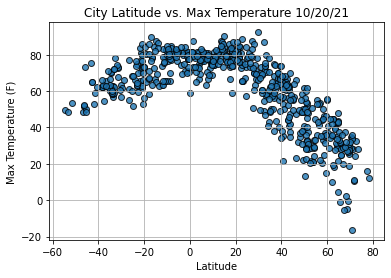

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

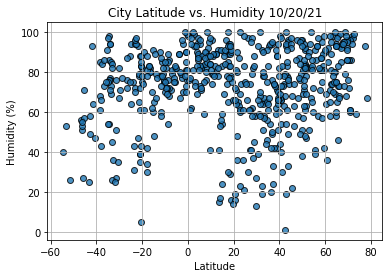

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

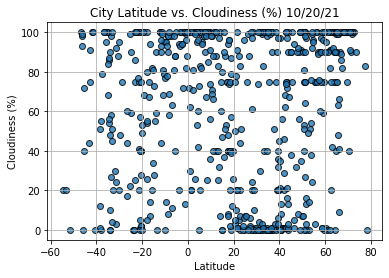

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

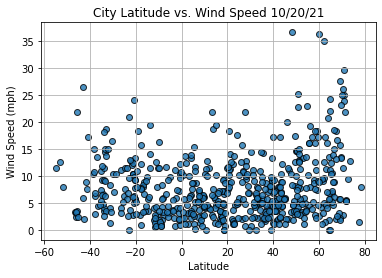

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()